In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'CM Roman'
matplotlib.rcParams['font.size'] = 12

In [3]:
#data
V_in = np.array([66.2,66.4,66.6,66.8,67.0,67.5,68.0])
V_out = np.array([13,20,26,33,39,54,68])
V_err = np.array([5,5,5,10,10,10,10])

#linear fit
def f(x, m,b):
    y = m*x+b
    return y

popt, pcov = curve_fit(f, V_in, V_out, sigma = V_err)
m,b = popt
m_err,b_err = np.sqrt(np.diag(pcov))

xfit = np.linspace(65.5,68.5,100)
fit = f(xfit, *popt)

#zero line
y_0 = np.zeros(len(xfit))

#find the zeros
breakdown = -b/m
breakdown_err = np.sqrt(breakdown**2*((b_err/b)**2+(m_err/m)**2))
print(f'Voltage breakdown =  {breakdown:0.1f} +- {breakdown_err:0.1f} V')

Voltage breakdown =  65.8 +- 1.5 V


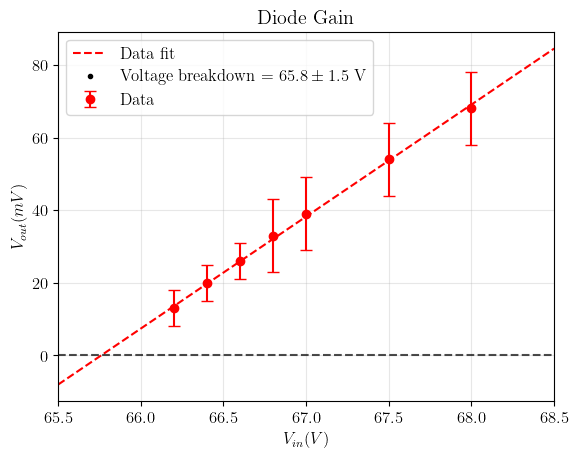

In [5]:
#Figure
fig, ax = plt.subplots()

ax.errorbar(V_in, V_out, V_err, color='r', fmt='o', capsize=4, label='Data')
ax.plot(xfit, fit, color='r', linestyle='--', label='Data fit')
ax.plot(xfit,y_0, color='k', alpha=0.7,linestyle='--')
ax.plot([],[],'.', color='k', label=rf'Voltage breakdown = ${breakdown:0.1f} \pm {breakdown_err:0.1f}$ V')
ax.set_xlim([65.5,68.5])
ax.set_xlabel(r'$V_{in} (V)$')
ax.set_ylabel(r'$V_{out} (mV)$')
ax.set_title('Diode Gain')
ax.grid(alpha=0.3)
ax.legend()

fig.savefig('../../Images/Diode_Gain.pdf')